<a href="https://colab.research.google.com/github/chirag3096/Project/blob/main/P_81_Air_Quality_forecasting(CO2_emissions)FINAL_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries:

In [2]:
#import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from pandas import read_excel
from numpy import inf
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller         
from statsmodels.tsa.seasonal import seasonal_decompose  
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from sklearn.preprocessing import MinMaxScaler 
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.formula.api as smf
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg


### Import Dataset:

In [4]:
#import dataset

data_CO2emission = pd.read_excel("CO2 dataset.xlsx", sheet_name="Sheet1", parse_dates=True)
data_CO2emission.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


### EDA (Exploratory Data Analysis) :

In [5]:
#shape
data_CO2emission.shape

(215, 2)

In [6]:
#data types
data_CO2emission.dtypes

Year      int64
CO2     float64
dtype: object

In [7]:
#info
data_CO2emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


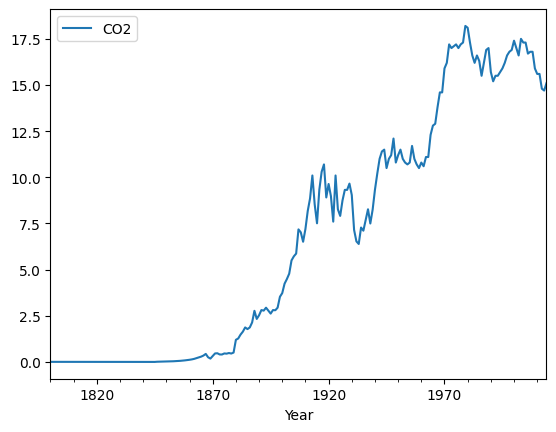

In [8]:
# Line Plot :
CO2emission = read_excel("CO2 dataset.xlsx", header=0, index_col=0, parse_dates=True )
CO2emission.plot()
pyplot.show()

#### Detecting of *Missing* and *Duplicate* Values:

In [9]:
# The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one :
data = data_CO2emission.copy()

In [10]:
# coerce will introduce NA values for non numeric data in the columns :
data["CO2"] = pd.to_numeric(data["CO2"], errors="coerce")

In [11]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 2)

In [14]:
#Print the duplicated rows
data[data.duplicated()]

,Year,CO2


In [15]:
#No Duplicate Values are present in the dataset

<Axes: >

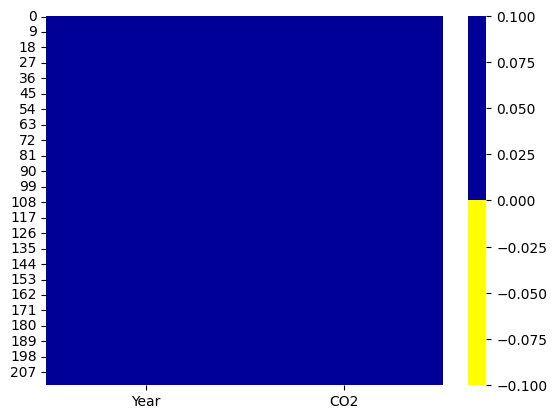

In [16]:
# Missing Values and Imputation :
import seaborn as sns

cols = data.columns 
colours = ['#ffff00','#000099'] 

sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [17]:
#checking for null values
data[data.isnull().any(axis=1)].head()

,Year,CO2


In [18]:
#sum of null values
data.isnull().sum()

Year    0
CO2     0
dtype: int64

In [ ]:
#No null Values are present in the dataset

#### Outlier Detection :

<Axes: >

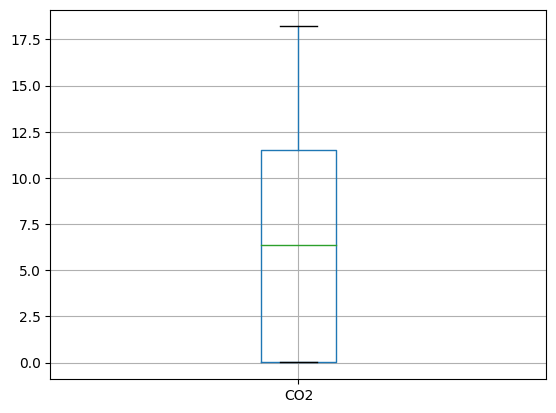

In [19]:
# Boxplot :
data.boxplot(column = "CO2")

In [ ]:
#No Outliers are present in the dataset

In [20]:
# Descriptive Stats :
data["CO2"].describe()

count    215.000000
mean       6.741970
std        6.522437
min        0.001750
25%        0.041050
50%        6.390000
75%       11.500000
max       18.200000
Name: CO2, dtype: float64

#### Visualization :

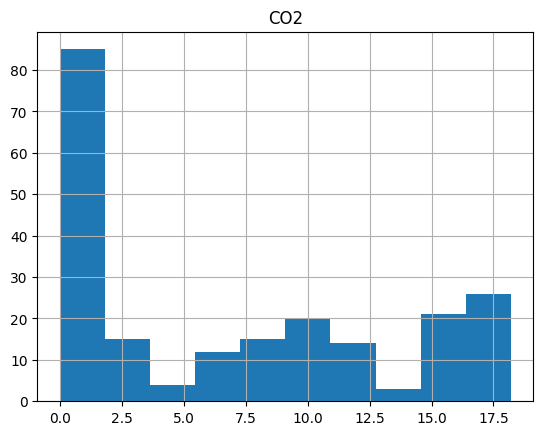

In [21]:
# Histogram of CO2 Emission :

data_histogram = read_excel("CO2 dataset.xlsx", header=0, index_col=0, parse_dates=True )
data_histogram.hist()
pyplot.show()

#data['CO2'].hist()

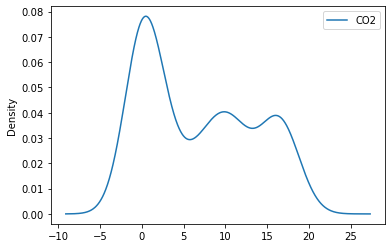

In [ ]:
# Density Plot :

data_density = read_excel("CO2 dataset.xlsx", header=0, index_col=0, parse_dates=True )
data_density.plot(kind="kde")
pyplot.show()

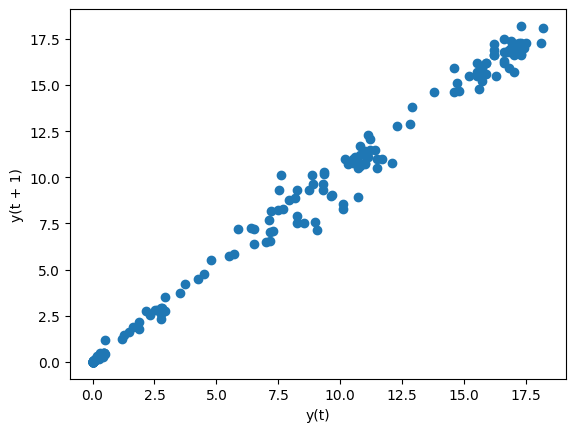

In [28]:
# Scatter Plot :

data_scatter = read_excel("CO2 dataset.xlsx", header=0, index_col=0, parse_dates=True )
lag_plot(data_scatter)
pyplot.show()

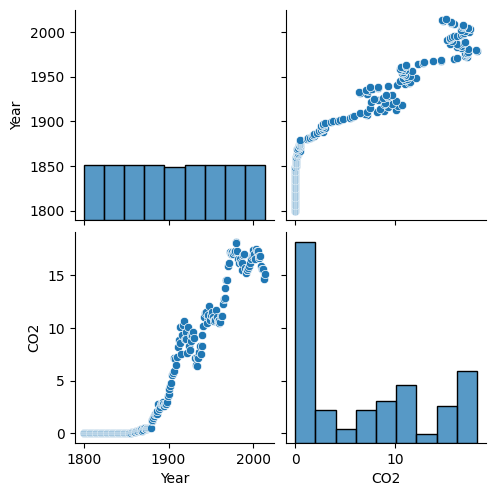

In [29]:
# Pair Plot :
sns.pairplot(data)

### Transformations :

#### Square Root Transform :

array([[<Axes: title={'center': 'sqrt_CO2'}>]], dtype=object)

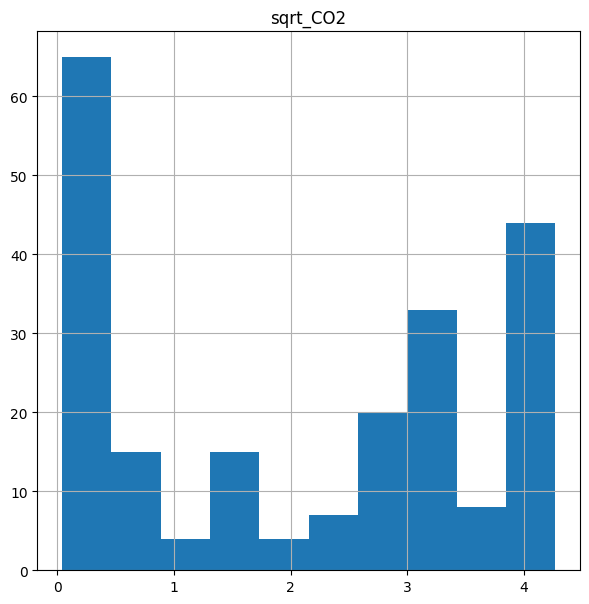

In [30]:
data_CO2 = pd.read_excel("CO2 dataset.xlsx", sheet_name="Sheet1", header=0, index_col=0, parse_dates=True)

#Square root transformation

data_CO2['sqrt_CO2'] = np.sqrt(data_CO2['CO2'])
data_CO2.hist(column='sqrt_CO2',figsize=(7,7))


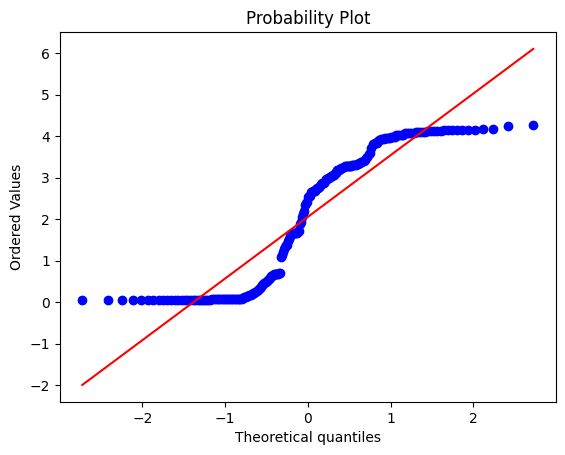

In [31]:
#Probability Plot(Square root transformation)

stats.probplot(data_CO2['sqrt_CO2'],plot=plt)
plt.show()

#### Log Transform :

array([[<Axes: title={'center': 'Log_CO2'}>]], dtype=object)

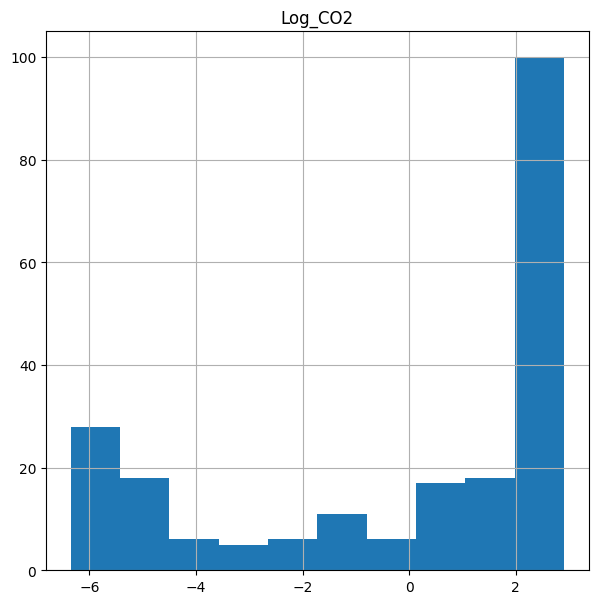

In [32]:
#Log Transformation

data_CO2['Log_CO2'] = np.log(data_CO2['CO2'])
data_CO2.hist(column='Log_CO2',figsize=(7,7))


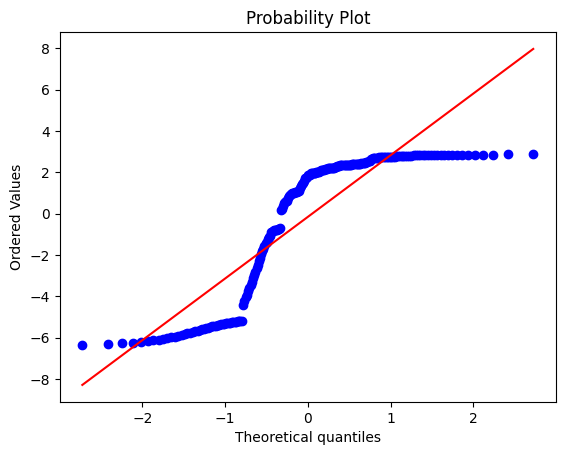

In [33]:
#Probability Plot(Log Transform)

stats.probplot(data_CO2['Log_CO2'],plot=plt)
plt.show()

#### Reciprocal Transform:

array([[<Axes: title={'center': 'recp_CO2'}>]], dtype=object)

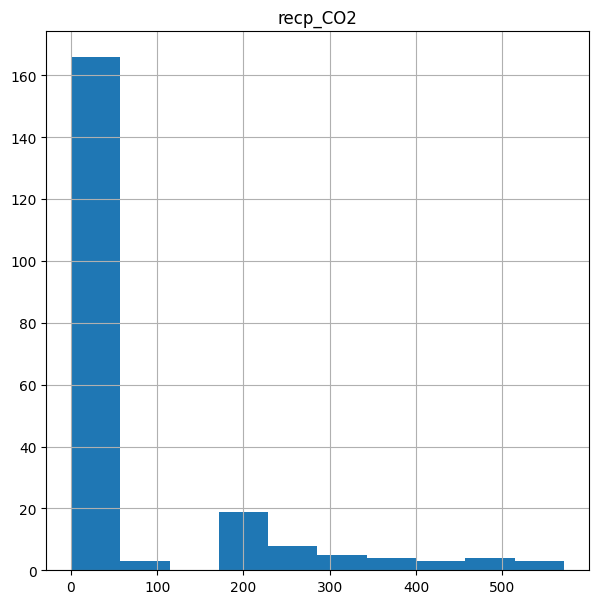

In [34]:
#Reciprocal Transformation

data_CO2['recp_CO2'] = np.reciprocal(data_CO2['CO2'])
data_CO2.hist(column='recp_CO2',figsize=(7,7))

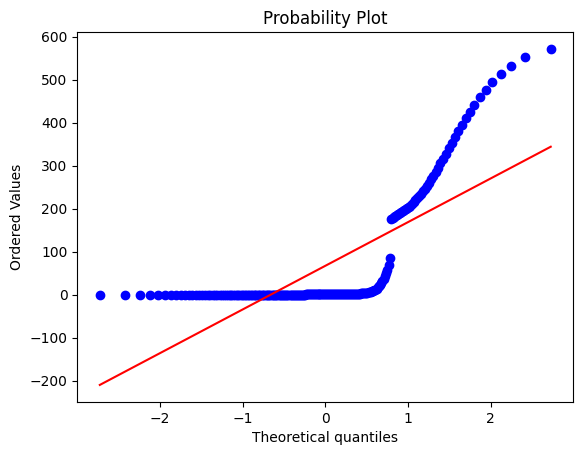

In [35]:
#Probability Plot(Reciprocal Transform)

stats.probplot(data_CO2['recp_CO2'],plot=plt)
plt.show()

#### Exponential transformation:

array([[<Axes: title={'center': 'exp_CO2'}>]], dtype=object)

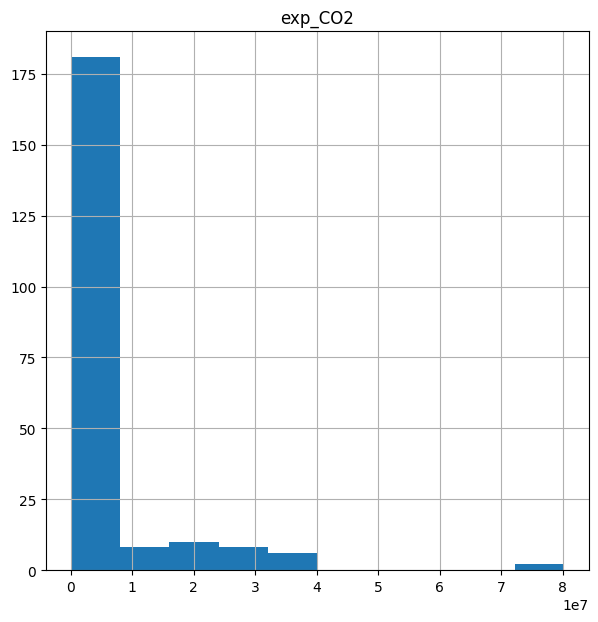

In [36]:
#Exponential transformation

data_CO2['exp_CO2'] = np.exp(data_CO2['CO2'])
data_CO2.hist(column='exp_CO2',figsize=(7,7))


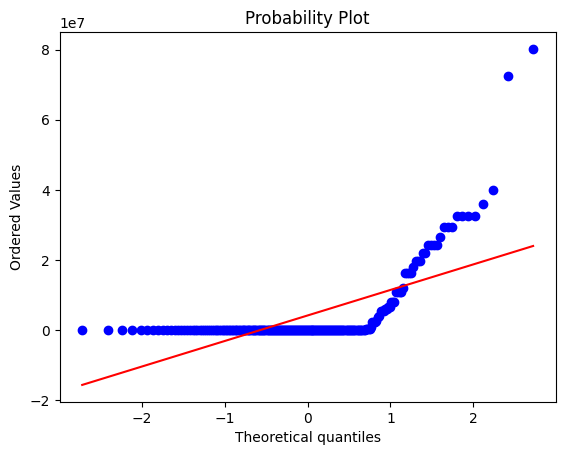

In [37]:
#Probability Plot(Exponential Transform)

stats.probplot(data_CO2['exp_CO2'],plot=plt)
plt.show()

In [38]:
data_CO2

,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2
Year,,,,,
1800-01-01,0.00568,0.075366,-5.170804,176.056338,1.005696e+00
1801-01-01,0.00561,0.074900,-5.183205,178.253119,1.005626e+00
1802-01-01,0.00555,0.074498,-5.193957,180.180180,1.005565e+00
1803-01-01,0.00548,0.074027,-5.206650,182.481752,1.005495e+00
1804-01-01,0.00542,0.073621,-5.217659,184.501845,1.005435e+00
...,...,...,...,...,...
2010-01-01,15.60000,3.949684,2.747271,0.064103,5.956538e+06
2011-01-01,15.60000,3.949684,2.747271,0.064103,5.956538e+06
2012-01-01,14.80000,3.847077,2.694627,0.067568,2.676445e+06


In [39]:
#Create new dataframe df

df = data_CO2.drop(['sqrt_CO2', 'Log_CO2','recp_CO2','exp_CO2'], axis = 1)

In [40]:
df.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


### Stationarity :

In [41]:
# Test for Stationarity (Dickey Fuller Test) :


def TestStationaryAdfuller(df, cutoff = 0.01):
    df_test = adfuller(df, autolag = 'AIC')
    df_test_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in df_test[4].items():
        df_test_output['Critical Value (%s)'%key] = value
    print(df_test_output)
    
    if df_test[1] <= cutoff:
        print("Failed to reject null hypothesis. Data is stationary")
    else:
        print("Failed to accept null hypothesis. Data is non-stationary ")

In [42]:
#Define Stationary Plot

def TestStationaryPlot(df):
    rol_mean = df.rolling(window = 20, center = False).mean()
    rol_std = df.rolling(window = 20, center = False).std()
    
    plt.plot(df, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)

In [43]:
# Test for Stationarity

#dataframe df

TestStationaryAdfuller(df.dropna(inplace=False))

Test Statistic                  -0.378463
p-value                          0.913633
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


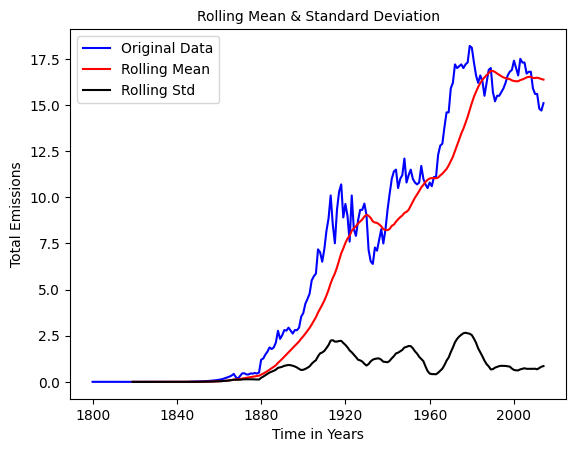

In [44]:
#Stationary Plot for Data

TestStationaryPlot(df)

In [45]:
#Above Data is non-stationary so we will use differencing
# Differencing :

df_first_difference = df - df.shift(1)

df_first_difference.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,-0.00007
1802-01-01,-0.00006
1803-01-01,-0.00007
1804-01-01,-0.00006


In [46]:
# test dickey fuller test on differenced data
# dataframe df_first_difference

TestStationaryAdfuller(df_first_difference.dropna(inplace=False))

Test Statistic                  -3.780005
p-value                          0.003119
#Lags Used                      15.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Failed to reject null hypothesis. Data is stationary


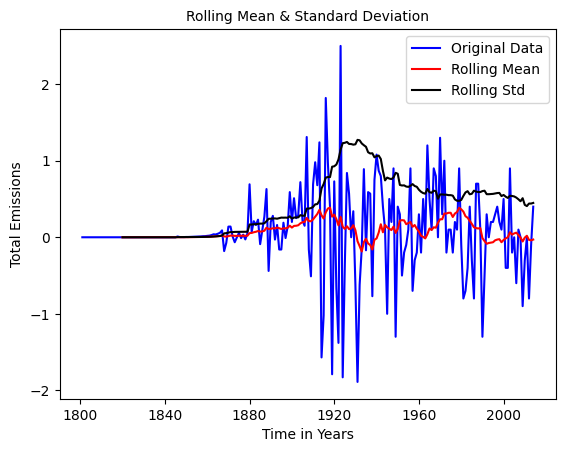

In [47]:
#Stationary Plot for first_difference data

TestStationaryPlot(df_first_difference)

In [48]:
#The first difference improves the stationarity of the series significantly. 
#Let us use the seasonal first order difference to remove the seasonality of the data and see how that impacts stationarity of the data.

In [49]:
#Seasonal First order differencing

data_CO2_seasonal_first_difference = df_first_difference - df_first_difference.shift(1)  

In [50]:
data_CO2_seasonal_first_difference.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,NaN
1802-01-01,0.00001
1803-01-01,-0.00001
1804-01-01,0.00001


## Again test dickey fuller test on data_CO2_seasonal_first_difference

TestStationaryAdfuller(data_CO2_seasonal_first_difference.dropna(inplace=False))

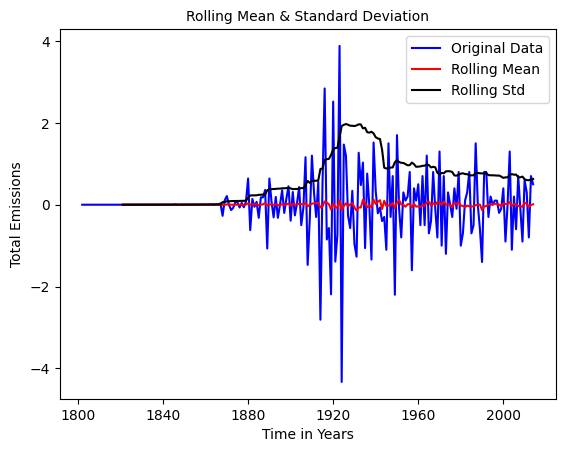

In [51]:
#Stationary Plot for seasonal_first_difference

TestStationaryPlot(data_CO2_seasonal_first_difference)

In [52]:
#We are considering this seasonal first difference for further analysis because it looks more stationary

### Time Series Decomposition Plot :

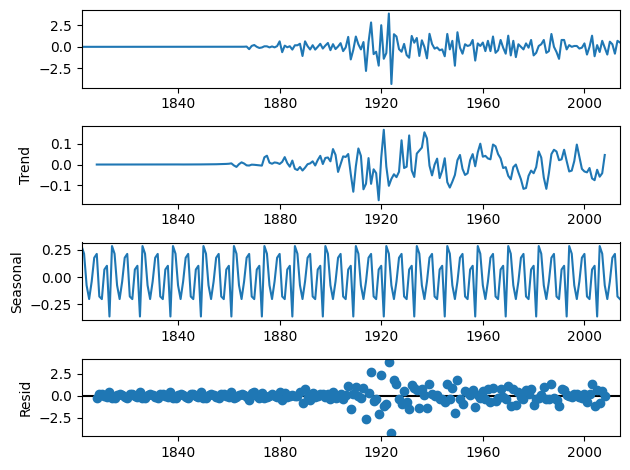

In [53]:
#Time Series Decomposition Plot for data_CO2_seasonal_first_difference

ts_decomposition = seasonal_decompose(data_CO2_seasonal_first_difference.dropna(),period=12)
ts_decomposition.plot()
plt.show()

### ACF Plot and PACF Plot :


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


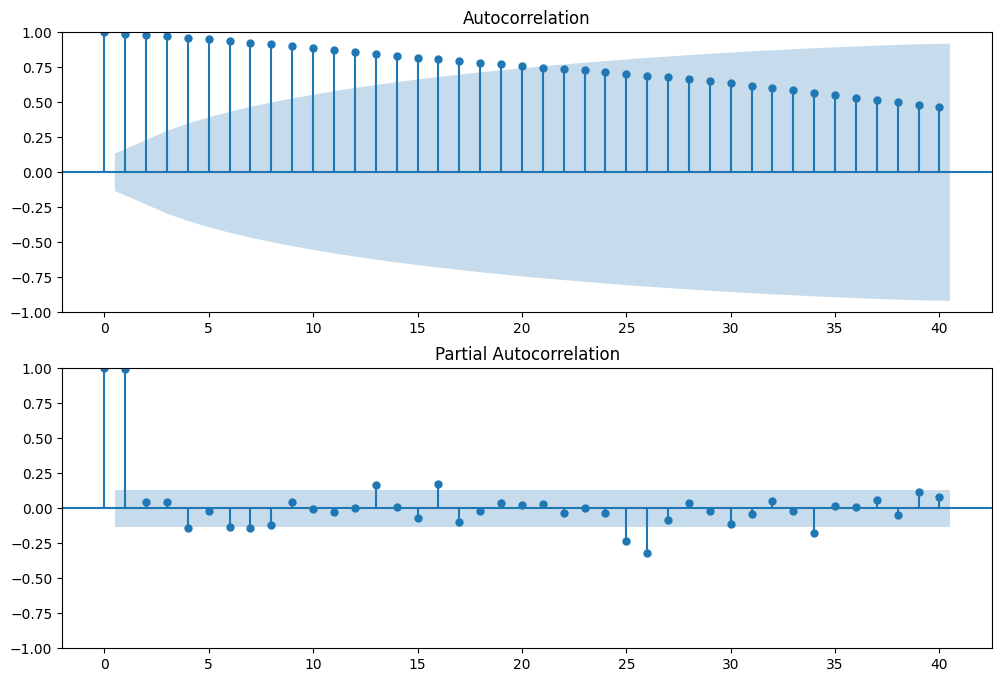

In [54]:
#ACF and PACF plot
#Non-Stationary Data

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_CO2['CO2'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_CO2['CO2'],lags=40,ax=ax2)

In [55]:
# Correlation Matrix :
data_CO2emission.corr()

,Year,CO2
Year,1.000000,0.951243
CO2,0.951243,1.000000


#### Normalizing and Standardizing Dataset :

In [56]:
# Normalizing dataset :


array = data_CO2.dropna().values
scaler = MinMaxScaler(feature_range=(0,1))
rescaled = scaler.fit_transform(array)

# summarize transformed data
set_printoptions(precision=4)
print(rescaled[:,:])

[[2.1595e-04 7.9380e-03 1.2729e-01 3.0803e-01 4.9187e-11]
 [2.1211e-04 7.8278e-03 1.2594e-01 3.1188e-01 4.8309e-11]
 [2.0881e-04 7.7327e-03 1.2478e-01 3.1525e-01 4.7556e-11]
 ...
 [8.1317e-01 9.0080e-01 9.7764e-01 2.2092e-05 3.3373e-02]
 [8.0767e-01 8.9771e-01 9.7691e-01 2.2896e-05 3.0197e-02]
 [8.2965e-01 9.0998e-01 9.7981e-01 1.9742e-05 4.5049e-02]]


In [57]:
# Standardizing dataset :

array = data_CO2.dropna().values
scaler = StandardScaler().fit(array)
rescaled = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=4)
print(rescaled[:,:])

[[-1.0352 -1.2476 -1.5114  0.8199 -0.3848]
 [-1.0352 -1.2479 -1.5151  0.8364 -0.3848]
 [-1.0352 -1.2482 -1.5184  0.8509 -0.3848]
 ...
 [ 1.2383  1.1292  0.8591 -0.5011 -0.1383]
 [ 1.2229  1.121   0.857  -0.5011 -0.1617]
 [ 1.2844  1.1536  0.8651 -0.5011 -0.052 ]]


### Time Series Forecasting Models :

### Non-stationary data:

In [58]:
#Splitting the data

Train = data_CO2.head(172)
Test = data_CO2.tail(43)

In [59]:
Train.head()

,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2
Year,,,,,
1800-01-01,0.00568,0.075366,-5.170804,176.056338,1.005696
1801-01-01,0.00561,0.074900,-5.183205,178.253119,1.005626
1802-01-01,0.00555,0.074498,-5.193957,180.180180,1.005565
1803-01-01,0.00548,0.074027,-5.206650,182.481752,1.005495
1804-01-01,0.00542,0.073621,-5.217659,184.501845,1.005435


In [60]:
Test.head()

,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2
Year,,,,,
1972-01-01,17.2,4.147288,2.844909,0.058140,2.950293e+07
1973-01-01,17.0,4.123106,2.833213,0.058824,2.415495e+07
1974-01-01,17.1,4.135215,2.839078,0.058480,2.669535e+07
1975-01-01,17.2,4.147288,2.844909,0.058140,2.950293e+07
1976-01-01,17.0,4.123106,2.833213,0.058824,2.415495e+07


In [61]:
#define RMSE_Value function

def RMSE_Value(forecast, actual):

    rmse_val = np.mean((forecast - actual)**2)**.5  
    return(rmse_val)

In [62]:
#define MAPE_Value function

def MAPE_Value(forecast, actual):
    mape_val = np.mean(np.abs(forecast - actual)/np.abs(actual)) 
    
    return(mape_val)

#### Simple Exponential Method

In [63]:
#Simple Exponential Method
#MAPE value

Train["CO2"] = Train["CO2"].astype('double') 
ses_model = SimpleExpSmoothing(Train["CO2"]).fit(smoothing_level=0.8)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE_ses_model=MAPE_Value(pred_ses,Test.CO2) 
MAPE_ses_model

<ipython-input-63-46073ef3c50c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["CO2"] = Train["CO2"].astype('double')
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


0.048941002349061465

In [64]:
#Single Exponential Method
#RMSE Value 

ses_model = SimpleExpSmoothing(Train["CO2"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE_Value(pred_ses,Test.CO2)
rmse_ses_model


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


0.8993916642120997

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


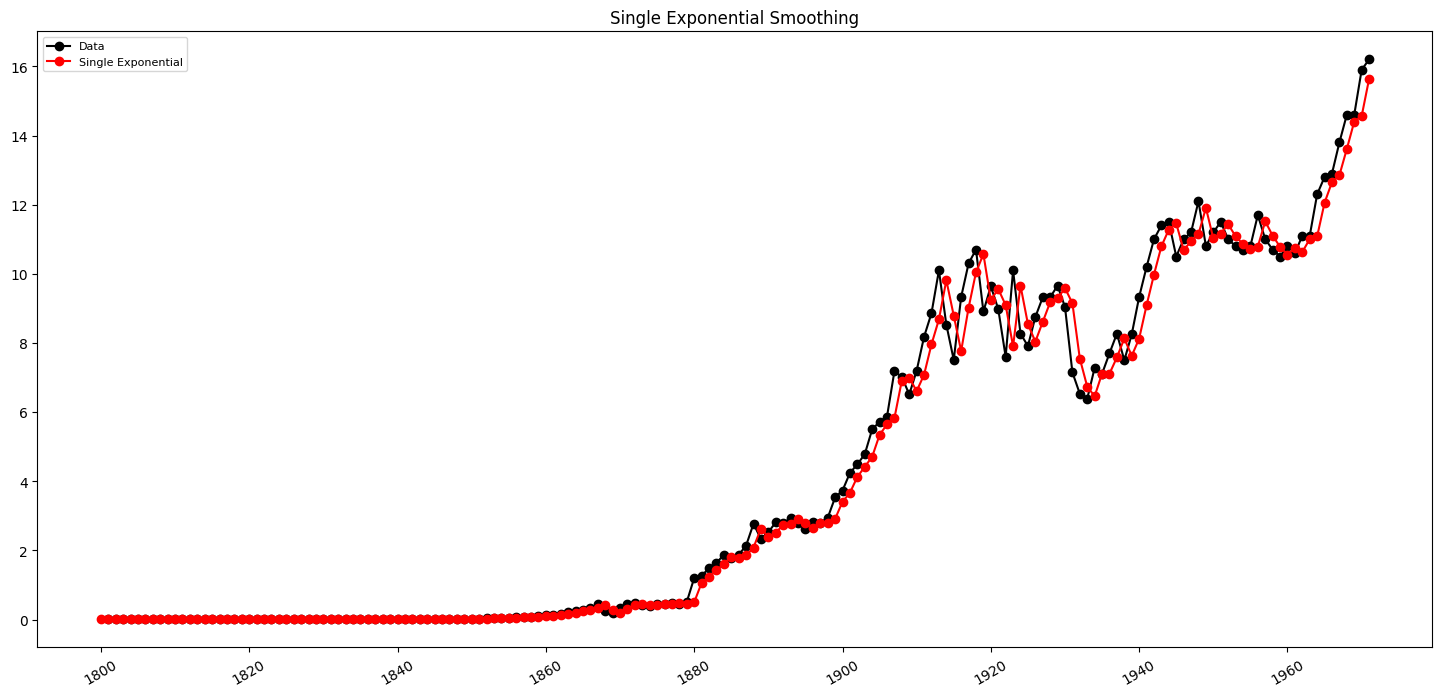

In [65]:
# Exponential Smoothing-Single:

data_SE = data_CO2[1:172]["CO2"]


fit1 = SimpleExpSmoothing(Train["CO2"]).fit(smoothing_level=0.8, optimized=False)


plt.figure(figsize=(18,8))


plt.plot(data_SE, marker="o", color="black", label='Data') 

plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, marker="o", color="red",label='Single Exponential')

plt.title('Single Exponential Smoothing')

plt.legend(loc='upper left', fontsize=8)





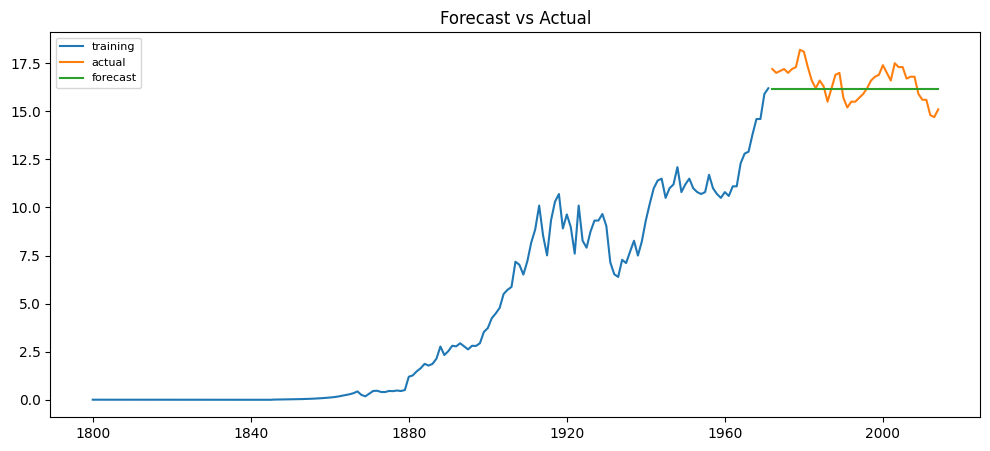

In [66]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train["CO2"], label='training')
plt.plot(Test["CO2"], label='actual')
plt.plot(pred_ses, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Holt method

In [67]:
#Holt method
#MAPE value

hw_model = Holt(Train["CO2"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE_hw_model= MAPE_Value(pred_hw,Test.CO2) 
MAPE_hw_model

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
<ipython-input-67-35c1c6ed5082>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["CO2"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


0.7049642569325844

In [68]:
#Holt method
#RMSE Value 

hw_model = Holt(Train['CO2']).fit()
pred_hw = hw_model.predict(start = Test.index[0],end= Test.index[-1])
rmse_hw_model = RMSE_Value(pred_hw,Test.CO2)
rmse_hw_model

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


2.45121378638159

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


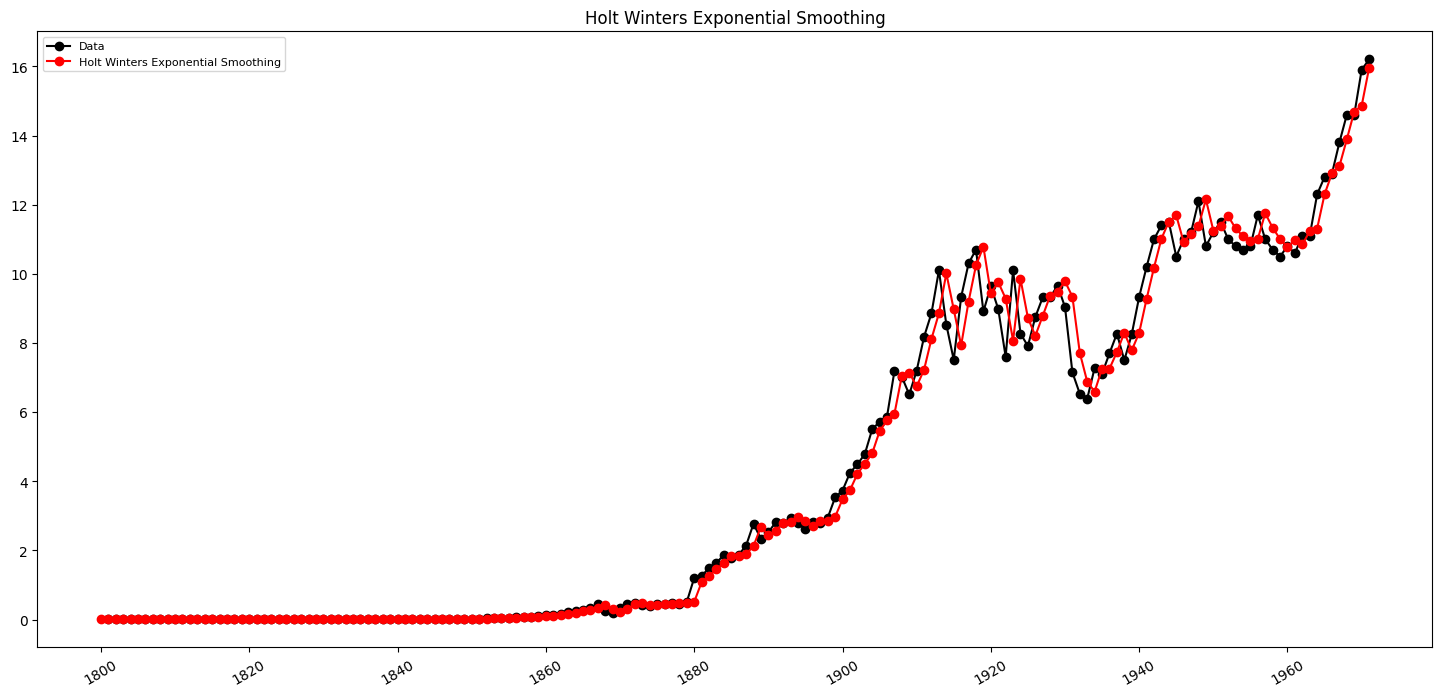

In [69]:
#Plot


fit2 = Holt(Train["CO2"], exponential=True).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))



plt.plot(data_SE, marker="o", color="black", label='Data') 

plt.xticks(rotation=30)



plt.plot(fit2.fittedvalues, marker="o", color="red",label = "Holt Winters Exponential Smoothing")

plt.title('Holt Winters Exponential Smoothing')

plt.legend(loc='upper left', fontsize=8)


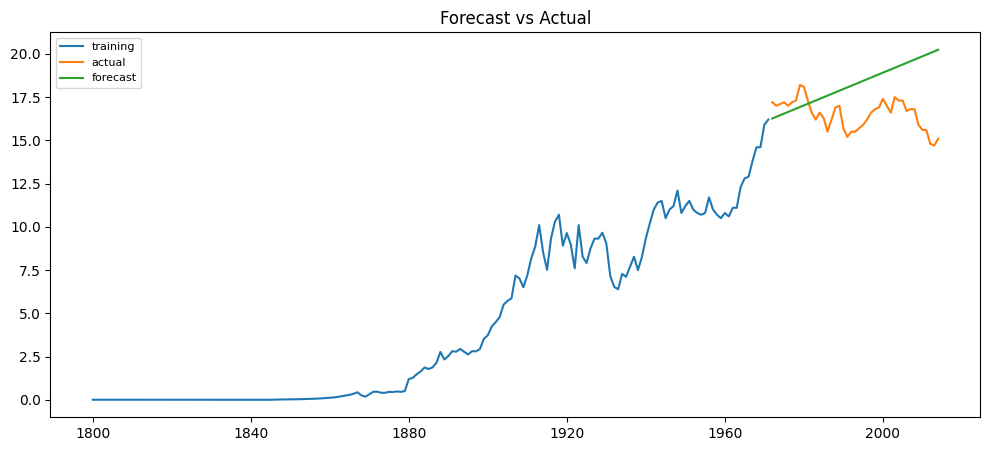

In [70]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train["CO2"], label='training')
plt.plot(Test["CO2"], label='actual')
plt.plot(pred_hw, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Holts winter exponential smoothing with additive seasonality and additive trend

In [71]:
#Holts winter exponential smoothing with additive seasonality and additive trend
#MAPE value

hwe_model_add_add = ExponentialSmoothing(Train["CO2"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE_hwe_add_add_model=MAPE_Value(pred_hwe_add_add,Test.CO2)  
MAPE_hwe_add_add_model

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


0.12749035066205083

In [72]:
#Holts winter exponential smoothing with additive seasonality and additive trend
#RMSE value

hwe_model_add_add = ExponentialSmoothing(Train["CO2"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE_Value(pred_hwe_add_add,Test.CO2)
rmse_hwe_add_add_model

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


2.457454616638322

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


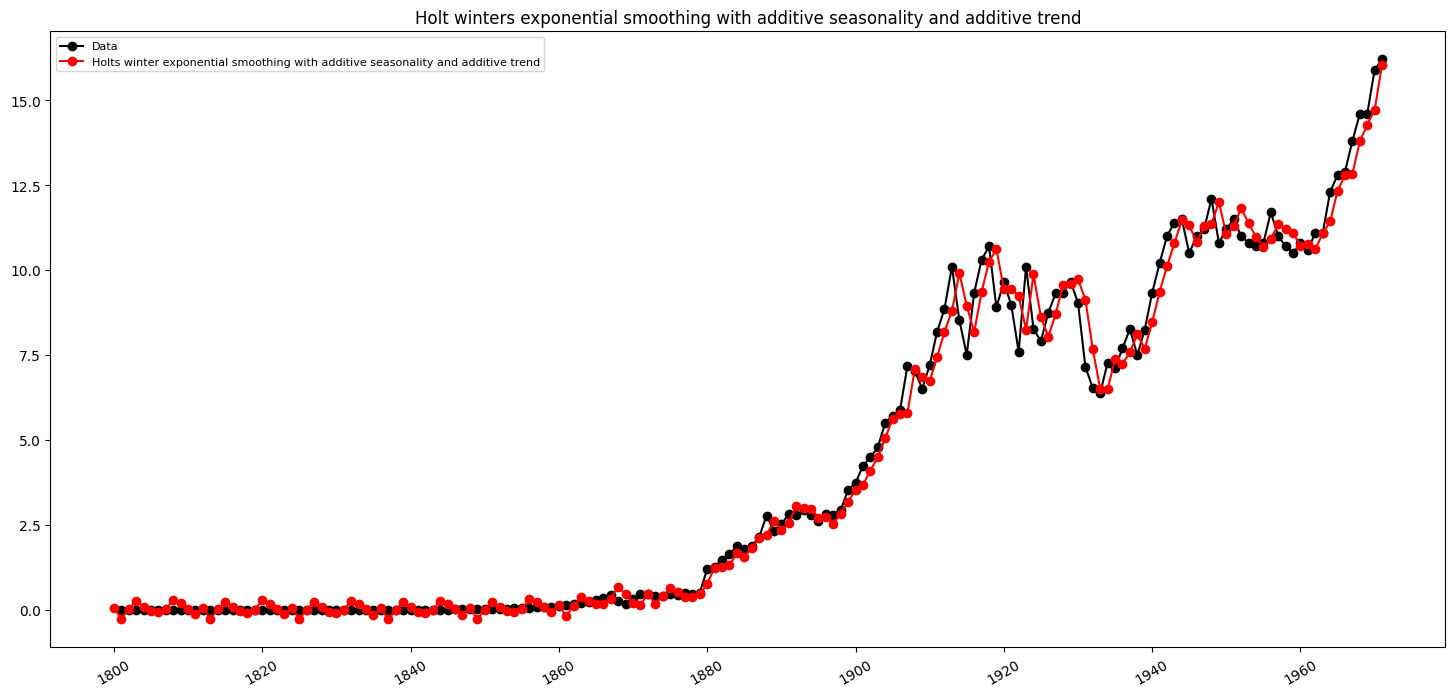

In [73]:
#Plot


fit3 = ExponentialSmoothing(Train["CO2"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, marker="o", color="black",label="Data")

plt.xticks(rotation=30)


plt.plot(fit3.fittedvalues, marker="o", color="red",label="Holts winter exponential smoothing with additive seasonality and additive trend")

plt.title('Holt winters exponential smoothing with additive seasonality and additive trend')

plt.legend(loc='upper left', fontsize=8)

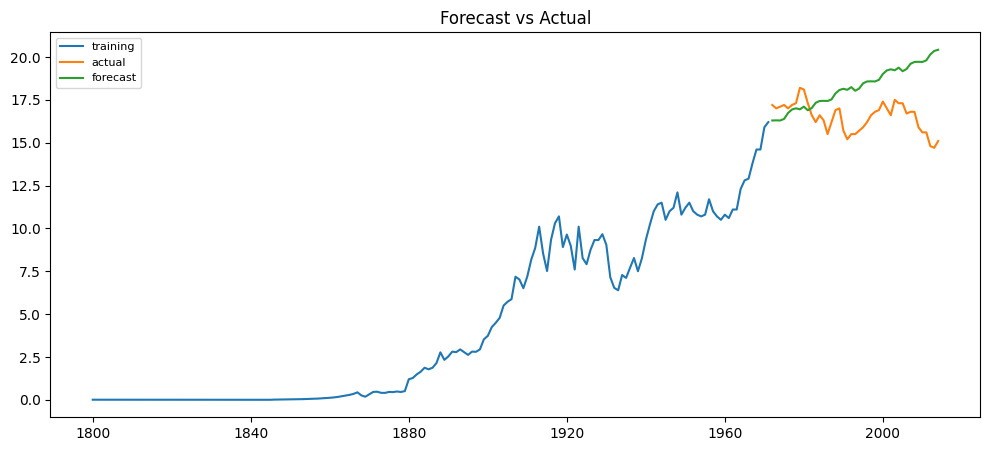

In [74]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train["CO2"], label='training')
plt.plot(Test["CO2"], label='actual')
plt.plot(pred_hwe_add_add, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [75]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
#MAPE value

hwe_model_mul_add = ExponentialSmoothing(Train["CO2"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE_hwe_model_mul_add_model=MAPE_Value(pred_hwe_mul_add,Test.CO2)  
MAPE_hwe_model_mul_add_model

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


0.6330349191765272

In [76]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
#RMSE value

hwe_model_mul_add = ExponentialSmoothing(Train["CO2"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE_Value(pred_hwe_mul_add,Test.CO2)
rmse_hwe_model_mul_add_model

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


12.054009404416467

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


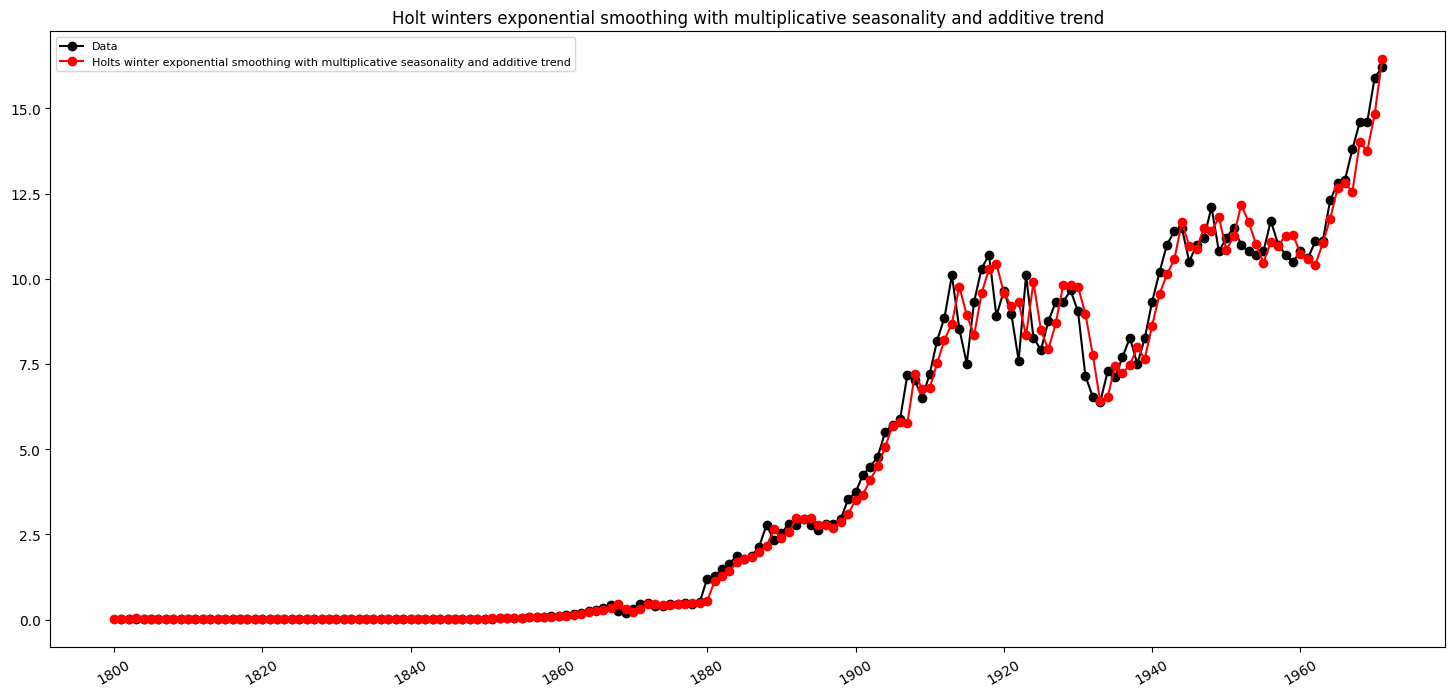

In [77]:
#Plot

fit4 = ExponentialSmoothing(Train["CO2"], seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, marker="o", color="black",label="Data")

plt.xticks(rotation=30)


plt.plot(fit4.fittedvalues, marker="o", color="red",label="Holts winter exponential smoothing with multiplicative seasonality and additive trend")

plt.title('Holt winters exponential smoothing with multiplicative seasonality and additive trend')

plt.legend(loc='upper left', fontsize=8)

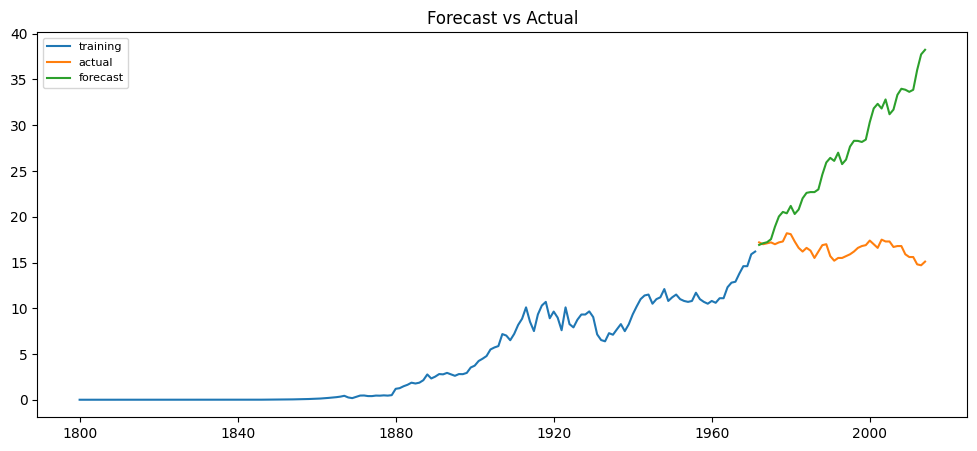

In [78]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train["CO2"], label='training')
plt.plot(Test["CO2"], label='actual')
plt.plot(pred_hwe_mul_add, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend

In [79]:
#Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend
#MAPE value

hwe_model_mul_mul = ExponentialSmoothing(Train["CO2"],seasonal="mul",trend="mul",seasonal_periods=12).fit() 
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = Test.index[0],end = Test.index[-1])
MAPE_hwe_model_mul_mul_model=MAPE_Value(pred_hwe_mul_mul,Test.CO2) 
MAPE_hwe_model_mul_mul_model

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


0.4354935914163378

In [80]:
#Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend
#RMSE value

hwe_model_mul_mul = ExponentialSmoothing(Train["CO2"],seasonal="mul",trend="mul",seasonal_periods=12).fit() 
pred_hwe_mul_mul = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_mul_model = RMSE_Value(pred_hwe_mul_mul,Test.CO2)
rmse_hwe_model_mul_mul_model

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


12.054009404416467

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


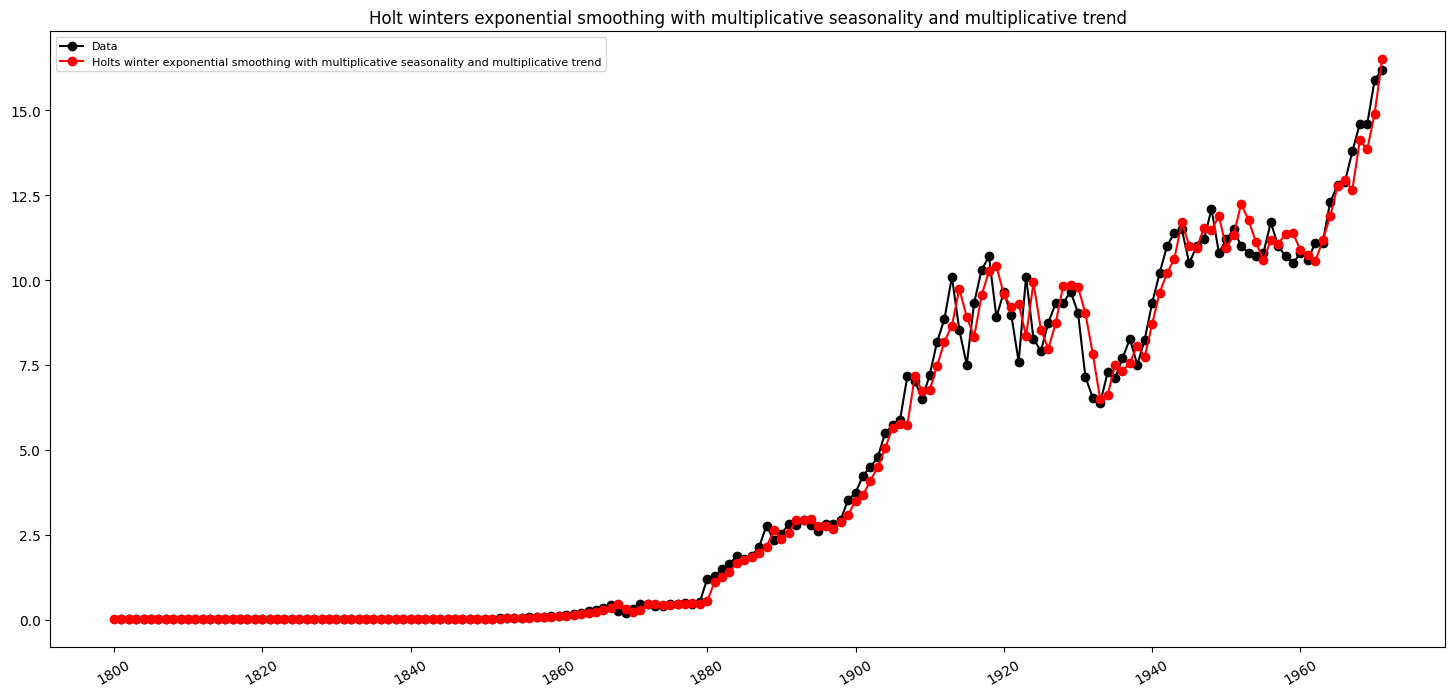

In [81]:
#Plot

fit5 = ExponentialSmoothing(Train["CO2"], seasonal="mul",trend="mul",seasonal_periods=12).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, marker="o",  color="black",label="Data")

plt.xticks(rotation=30)


plt.plot(fit5.fittedvalues, marker="o", color="red",label="Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend")

plt.title('Holt winters exponential smoothing with multiplicative seasonality and multiplicative trend')

plt.legend(loc='upper left', fontsize=8)

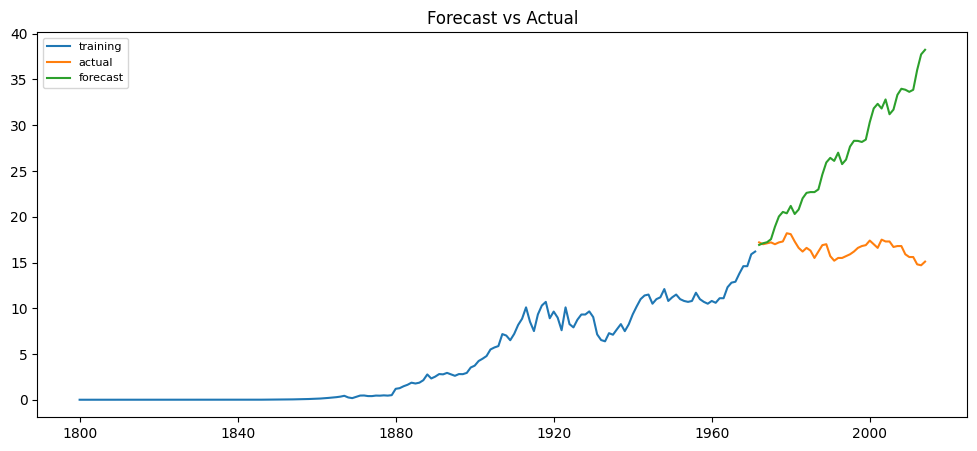

In [82]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train["CO2"], label='training')
plt.plot(Test["CO2"], label='actual')
plt.plot(pred_hwe_mul_mul, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Linear , Exponential and Quadratic Models of forecasting: 

In [83]:
# Data preprocessing for models
data_model = data_CO2.copy()
data_model.head()

,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2
Year,,,,,
1800-01-01,0.00568,0.075366,-5.170804,176.056338,1.005696
1801-01-01,0.00561,0.074900,-5.183205,178.253119,1.005626
1802-01-01,0.00555,0.074498,-5.193957,180.180180,1.005565
1803-01-01,0.00548,0.074027,-5.206650,182.481752,1.005495
1804-01-01,0.00542,0.073621,-5.217659,184.501845,1.005435


In [84]:
data_model["t"] = np.arange(1,216)
data_model["t_squared"]=data_model["t"]*data_model["t"]
data_model["lg_CO2"]= np.log(data_model["CO2"])
data_model.head()

,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2,t,t_squared,lg_CO2
Year,,,,,,,,
1800-01-01,0.00568,0.075366,-5.170804,176.056338,1.005696,1,1,-5.170804
1801-01-01,0.00561,0.074900,-5.183205,178.253119,1.005626,2,4,-5.183205
1802-01-01,0.00555,0.074498,-5.193957,180.180180,1.005565,3,9,-5.193957
1803-01-01,0.00548,0.074027,-5.206650,182.481752,1.005495,4,16,-5.206650
1804-01-01,0.00542,0.073621,-5.217659,184.501845,1.005435,5,25,-5.217659


In [85]:
#Splitting data into Train and Test
Train_m = data_model.head(172)
Test_m = data_model.tail(43)

In [86]:
Train_m.head()

,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2,t,t_squared,lg_CO2
Year,,,,,,,,
1800-01-01,0.00568,0.075366,-5.170804,176.056338,1.005696,1,1,-5.170804
1801-01-01,0.00561,0.074900,-5.183205,178.253119,1.005626,2,4,-5.183205
1802-01-01,0.00555,0.074498,-5.193957,180.180180,1.005565,3,9,-5.193957
1803-01-01,0.00548,0.074027,-5.206650,182.481752,1.005495,4,16,-5.206650
1804-01-01,0.00542,0.073621,-5.217659,184.501845,1.005435,5,25,-5.217659


In [87]:
Test_m.head()

,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2,t,t_squared,lg_CO2
Year,,,,,,,,
1972-01-01,17.2,4.147288,2.844909,0.058140,2.950293e+07,173,29929,2.844909
1973-01-01,17.0,4.123106,2.833213,0.058824,2.415495e+07,174,30276,2.833213
1974-01-01,17.1,4.135215,2.839078,0.058480,2.669535e+07,175,30625,2.839078
1975-01-01,17.2,4.147288,2.844909,0.058140,2.950293e+07,176,30976,2.844909
1976-01-01,17.0,4.123106,2.833213,0.058824,2.415495e+07,177,31329,2.833213


#### Linear Model

In [88]:
linear_model = smf.ols('CO2~t',data=Train_m).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test_m['t'])))
#RMSE value
rmse_linear_model = RMSE_Value(pred_linear,Test_m['CO2'])
rmse_linear_model

3.1445157061117652

In [89]:
#MAPE value
MAPE_linear_model = MAPE_Value(pred_linear,Test_m['CO2'])
MAPE_linear_model

0.16483919760009139

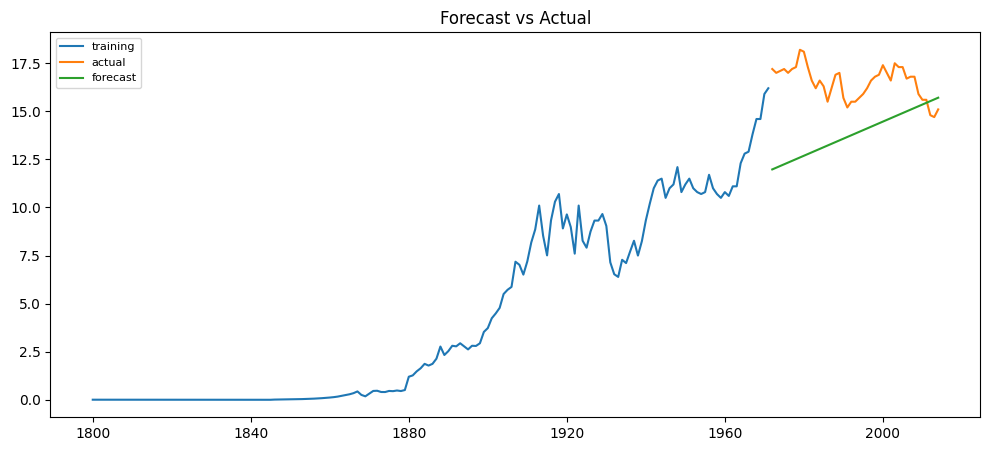

In [90]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train_m["CO2"], label='training')
plt.plot(Test_m["CO2"], label='actual')
plt.plot(pred_linear, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [91]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     944.6
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           2.54e-71
Time:                        14:38:38   Log-Likelihood:                -351.72
No. Observations:                 172   AIC:                             707.4
Df Residuals:                     170   BIC:                             713.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3801      0.288    -11.732      0.000      -3.949      -2.811
t              0.0888      0.003     30.734      0.000       0.083       0.094
==============================================================================
Omnibus:                       38.221   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.438
Skew:                           0.105   Prob(JB):                       0.0147
Kurtosis:                       1.936   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Exponential Model

In [92]:
Exp = smf.ols('lg_CO2~t',data=Train_m).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test_m['t'])))

#RMSE value
rmse_Exp_model = RMSE_Value(np.exp(pred_Exp),Test_m['CO2'])
rmse_Exp_model

550.3307096054042

In [93]:
#MAPE Value
MAPE_Exp_model = MAPE_Value(np.exp(pred_Exp),Test_m['CO2'])
MAPE_Exp_model

27.070958538117438

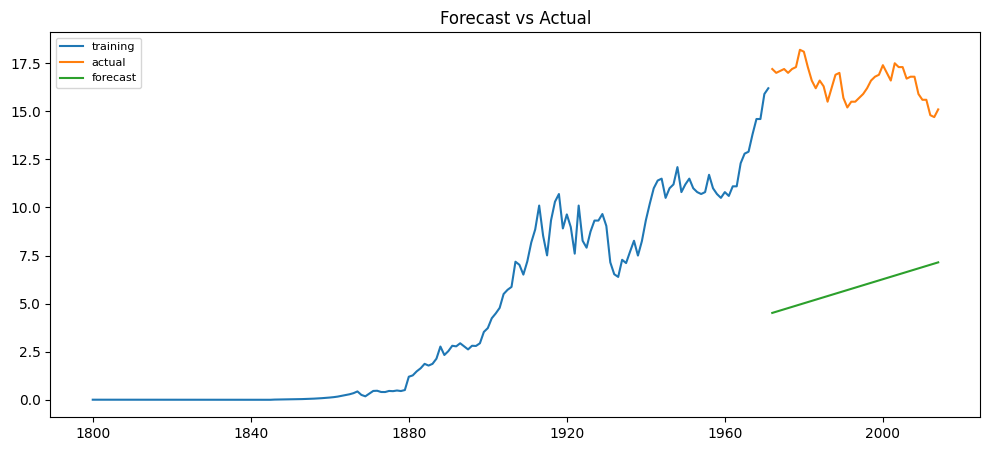

In [94]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train_m["CO2"], label='training')
plt.plot(Test_m["CO2"], label='actual')
plt.plot(pred_Exp, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [95]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lg_CO2   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1198.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           6.73e-79
Time:                        14:38:50   Log-Likelihood:                -271.13
No. Observations:                 172   AIC:                             546.3
Df Residuals:                     170   BIC:                             552.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3091      0.180    -34.988      0.000      -6.665      -5.953
t              0.0626      0.002     34.616      0.000       0.059       0.066
==============================================================================
Omnibus:                       14.863   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.019
Skew:                          -0.460   Prob(JB):                      0.00668
Kurtosis:                       2.257   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Quadratic Model

In [96]:
Quad = smf.ols('CO2~t+t_squared',data=Train_m).fit()
pred_Quad = pd.Series(Quad.predict(Test_m[["t","t_squared"]]))

#RMSE VALUE
rmse_Quad_model = RMSE_Value(pred_Quad,Test_m['CO2'])
rmse_Quad_model

4.495138217852216

In [97]:
#MAPE Value
MAPE_Quad_model = MAPE_Value(pred_Quad,Test_m['CO2'])
MAPE_Quad_model

0.231501579962329

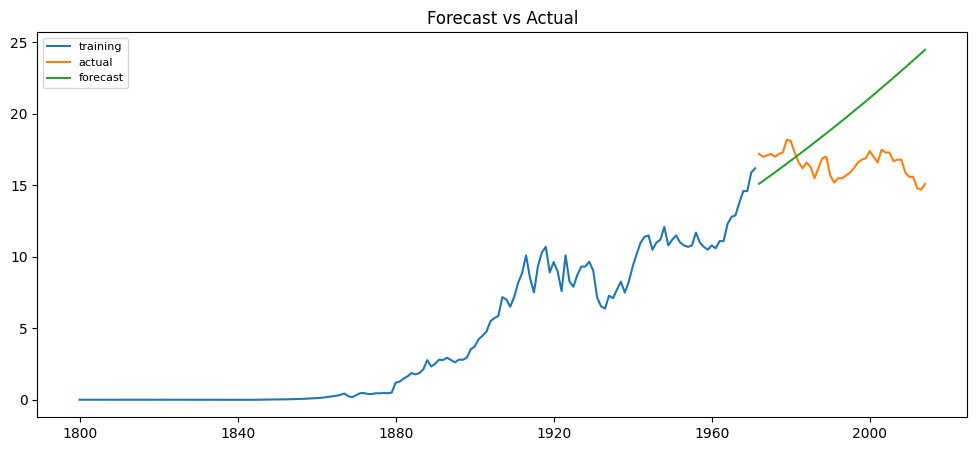

In [98]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train_m["CO2"], label='training')
plt.plot(Test_m["CO2"], label='actual')
plt.plot(pred_Quad, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [99]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1128.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.78e-98
Time:                        14:39:41   Log-Likelihood:                -284.37
No. Observations:                 172   AIC:                             574.7
Df Residuals:                     169   BIC:                             584.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2444      0.295     -0.828      0.409      -0.827       0.338
t             -0.0193      0.008     -2.456      0.015      -0.035      -0.004
t_squared      0.0006   4.41e-05     14.172      0.000       0.001       0.001
==============================================================================
Omnibus:                       33.246   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.854
Skew:                           1.048   Prob(JB):                     1.49e-11
Kurtosis:                       4.601   Cond. No.                     4.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### ARIMA MODEL NON STATIONARY DATA

In [100]:
df.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [101]:
#splitting the data

train_a = df[:-43]
test_a = df[-43:]

In [102]:
train_a.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [103]:
test_a.head()

,CO2
Year,
1972-01-01,17.2
1973-01-01,17.0
1974-01-01,17.1
1975-01-01,17.2
1976-01-01,17.0


In [104]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [105]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [106]:
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train_a.values, test_a.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=10.984
ARIMA(0, 0, 1) RMSE=5.779
ARIMA(0, 0, 2) RMSE=3.484
ARIMA(0, 0, 3) RMSE=2.236
ARIMA(0, 0, 4) RMSE=1.841
ARIMA(0, 1, 0) RMSE=0.507
ARIMA(0, 1, 1) RMSE=0.511
ARIMA(0, 1, 2) RMSE=0.507
ARIMA(0, 1, 3) RMSE=0.511
ARIMA(0, 1, 4) RMSE=0.513
ARIMA(0, 2, 0) RMSE=0.671
ARIMA(0, 2, 1) RMSE=0.525
ARIMA(0, 2, 2) RMSE=0.536
ARIMA(0, 2, 3) RMSE=0.537
ARIMA(0, 2, 4) RMSE=0.535
ARIMA(0, 3, 0) RMSE=1.100
ARIMA(0, 3, 1) RMSE=0.673
ARIMA(0, 3, 2) RMSE=0.538
ARIMA(0, 3, 3) RMSE=0.550
ARIMA(0, 3, 4) RMSE=0.568
ARIMA(0, 4, 0) RMSE=1.989
ARIMA(0, 4, 1) RMSE=1.103
ARIMA(0, 4, 2) RMSE=0.706
ARIMA(0, 4, 3) RMSE=0.535
ARIMA(0, 4, 4) RMSE=6.652
ARIMA(1, 0, 0) RMSE=0.506
ARIMA(1, 0, 1) RMSE=0.510
ARIMA(1, 0, 2) RMSE=0.507
ARIMA(1, 0, 3) RMSE=0.510
ARIMA(1, 0, 4) RMSE=0.512
ARIMA(1, 1, 0) RMSE=0.510
ARIMA(1, 1, 1) RMSE=0.503
ARIMA(1, 1, 2) RMSE=0.508
ARIMA(1, 1, 3) RMSE=0.513
ARIMA(1, 1, 4) RMSE=0.514
ARIMA(1, 2, 0) RMSE=0.646
ARIMA(1, 2, 1) RMSE=0.534
ARIMA(1, 2, 2) RMSE=0.520
ARIMA(1, 2,

In [107]:
#order(3,1,4)

model_arima_a = ARIMA(train_a['CO2'],order = (3,1,4))
model_arima_a = model_arima_a.fit()
model_arima_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  172
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -138.277
Date:                Thu, 13 Apr 2023   AIC                            292.555
Time:                        15:20:16   BIC                            317.688
Sample:                    01-01-1800   HQIC                           302.753
                         - 01-01-1971                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8374      0.378      2.213      0.027       0.096       1.579
ar.L2          0.1333      0.474      0.281      0.778      -0.795       1.062
ar.L3         -0.4673      0.235     -1.985      0.047      -0.929      -0.006
ma.L1         -0.9088      0.390     -2.331      0.020      -1.673      -0.145
ma.L2         -0.2044      0.486     -0.421      0.674      -1.156       0.747
ma.L3          0.7179      0.200      3.594      0.000       0.326       1.110
ma.L4         -0.0632      0.115     -0.549      0.583      -0.289       0.162
sigma2         0.2939      0.023     12.656      0.000       0.248       0.339
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                87.87
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):           76880.63   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
### prediction on test set
start = len(train_a)
end = len(train_a)+len(test_a)-1
pred_arima_a = model_arima_a.predict(start=start,end=end)
print(pred_arima_a)

1972-01-01    16.180647
1973-01-01    16.411194
1974-01-01    16.466143
1975-01-01    16.545084
1976-01-01    16.510773
1977-01-01    16.466886
1978-01-01    16.388669
1979-01-01    16.333354
1980-01-01    16.297116
1981-01-01    16.295948
1982-01-01    16.315990
1983-01-01    16.349552
1984-01-01    16.380875
1985-01-01    16.402213
1986-01-01    16.408573
1987-01-01    16.402105
1988-01-01    16.387564
1989-01-01    16.371554
1990-01-01    16.359231
1991-01-01    16.353573
1992-01-01    16.354674
1993-01-01    16.360600
1994-01-01    16.368354
1995-01-01    16.375123
1996-01-01    16.379055
1997-01-01    16.379626
1998-01-01    16.377466
1999-01-01    16.373896
2000-01-01    16.370350
2001-01-01    16.367915
2002-01-01    16.367072
2003-01-01    16.367698
2004-01-01    16.369248
2005-01-01    16.371024
2006-01-01    16.372424
2007-01-01    16.373110
2008-01-01    16.373040
2009-01-01    16.372419
2010-01-01    16.371570
2011-01-01    16.370808
2012-01-01    16.370347
2013-01-01    16

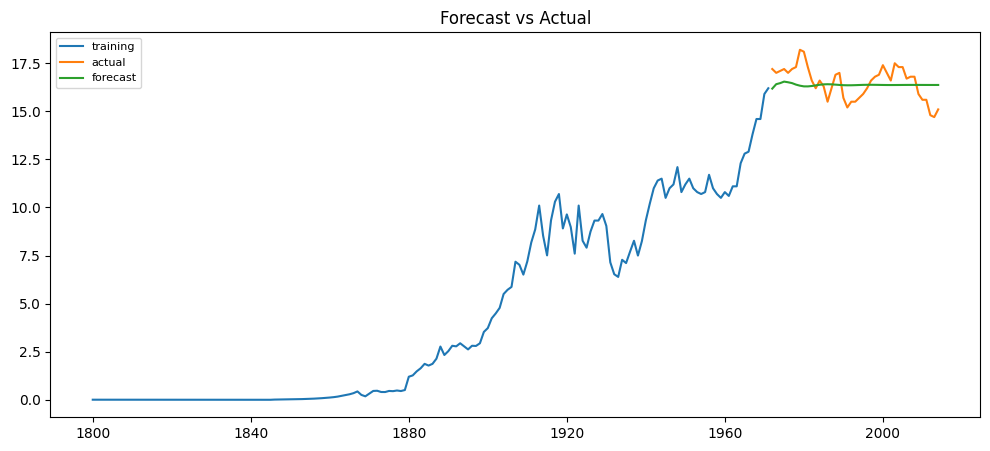

In [109]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_a["CO2"], label='training')
plt.plot(test_a["CO2"], label='actual')
plt.plot(pred_arima_a, label='forecast')

plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [110]:
#RMSE Value
RMSE_ARIMA_a = RMSE_Value(pred_arima_a.values, test_a.values)
RMSE_ARIMA_a

0.8483252834333539

In [111]:
#MAPE Value
MAPE_ARIMA_a = MAPE_Value(pred_arima_a.values, test_a.values)
MAPE_ARIMA_a

0.04445347712278784

### Stationary Data:

#### Model - ARIMA(Stationary Data) :

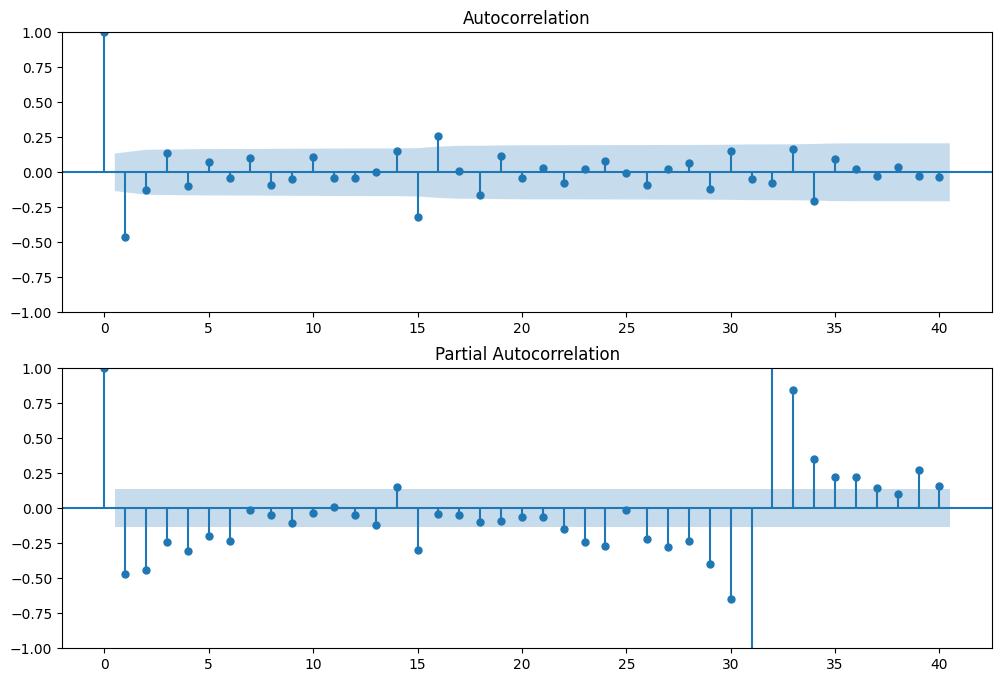

In [112]:
#ACF and PACF plots:
#Stationary Data

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_CO2_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_CO2_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax2)

In [113]:
#dataframe seasonal first difference

data_CO2_seasonal_first_difference.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,NaN
1802-01-01,0.00001
1803-01-01,-0.00001
1804-01-01,0.00001


In [114]:
X= data_CO2_seasonal_first_difference.dropna(inplace=False)

In [115]:
X.head()

,CO2
Year,
1802-01-01,1.000000e-05
1803-01-01,-1.000000e-05
1804-01-01,1.000000e-05
1805-01-01,-8.673617e-19
1806-01-01,-1.000000e-05


In [116]:
# Create Training and Test
train = X.iloc[:-43]
test = X.iloc[-43:]

In [117]:
print(train.shape,test.shape)

(170, 1) (43, 1)


In [118]:
train.head()

,CO2
Year,
1802-01-01,1.000000e-05
1803-01-01,-1.000000e-05
1804-01-01,1.000000e-05
1805-01-01,-8.673617e-19
1806-01-01,-1.000000e-05


In [119]:
test.head()

,CO2
Year,
1972-01-01,7.000000e-01
1973-01-01,-1.200000e+00
1974-01-01,3.000000e-01
1975-01-01,-3.552714e-15
1976-01-01,-3.000000e-01


In [120]:
# evaluate parameters

p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, test.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.673
ARIMA(0, 0, 1) RMSE=0.545
ARIMA(0, 0, 2) RMSE=0.558
ARIMA(0, 0, 3) RMSE=0.559
ARIMA(0, 0, 4) RMSE=0.555
ARIMA(0, 1, 0) RMSE=1.100
ARIMA(0, 1, 1) RMSE=0.673
ARIMA(0, 1, 2) RMSE=0.538
ARIMA(0, 1, 3) RMSE=0.549
ARIMA(0, 1, 4) RMSE=0.568
ARIMA(0, 2, 0) RMSE=1.989
ARIMA(0, 2, 1) RMSE=1.103
ARIMA(0, 2, 2) RMSE=0.706
ARIMA(0, 2, 3) RMSE=0.536
ARIMA(0, 2, 4) RMSE=0.544
ARIMA(0, 3, 0) RMSE=3.758
ARIMA(0, 3, 1) RMSE=1.994
ARIMA(0, 3, 2) RMSE=1.110
ARIMA(0, 3, 3) RMSE=0.710
ARIMA(0, 3, 4) RMSE=0.588
ARIMA(0, 4, 0) RMSE=7.198
ARIMA(0, 4, 1) RMSE=3.768
ARIMA(0, 4, 2) RMSE=2.005
ARIMA(0, 4, 3) RMSE=1.119
ARIMA(0, 4, 4) RMSE=0.735
ARIMA(1, 0, 0) RMSE=0.648
ARIMA(1, 0, 1) RMSE=0.555
ARIMA(1, 0, 2) RMSE=0.544
ARIMA(1, 0, 3) RMSE=0.556
ARIMA(1, 0, 4) RMSE=0.555
ARIMA(1, 1, 0) RMSE=0.923
ARIMA(1, 1, 1) RMSE=0.648
ARIMA(1, 1, 2) RMSE=0.547
ARIMA(1, 1, 3) RMSE=0.540
ARIMA(1, 1, 4) RMSE=0.561
ARIMA(1, 2, 0) RMSE=1.417
ARIMA(1, 2, 1) RMSE=0.925
ARIMA(1, 2, 2) RMSE=0.733
ARIMA(1, 2, 

#### ARIMA model

In [155]:
#order(1,2,4)
model_arima = ARIMA(train['CO2'],order = (1,2,4))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  170
Model:                 ARIMA(1, 2, 4)   Log Likelihood                -157.772
Date:                Thu, 13 Apr 2023   AIC                            327.543
Time:                        18:19:19   BIC                            346.287
Sample:                    01-01-1802   HQIC                           335.150
                         - 01-01-1971                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9997     11.529     -0.087      0.931     -23.596      21.597
ma.L1         -1.9697     15.180     -0.130      0.897     -31.721      27.782
ma.L2         -0.0292     44.952     -0.001      0.999     -88.134      88.076
ma.L3          1.9692     44.626      0.044      0.965     -85.497      89.435
ma.L4         -0.9702     14.848     -0.065      0.948     -30.072      28.132
sigma2         0.3183      1.292      0.246      0.805      -2.214       2.851
===================================================================================
Ljung-Box (L1) (Q):                   1.58   Jarque-Bera (JB):               208.13
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):          234048.56   Skew:                            -0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
### prediction on test set
start = len(train)
end = len(train)+len(test)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

1972-01-01   -0.062535
1973-01-01    0.003906
1974-01-01    0.000533
1975-01-01    0.003925
1976-01-01    0.000554
1977-01-01    0.003944
1978-01-01    0.000575
1979-01-01    0.003963
1980-01-01    0.000596
1981-01-01    0.003982
1982-01-01    0.000617
1983-01-01    0.004000
1984-01-01    0.000638
1985-01-01    0.004019
1986-01-01    0.000659
1987-01-01    0.004038
1988-01-01    0.000680
1989-01-01    0.004057
1990-01-01    0.000701
1991-01-01    0.004075
1992-01-01    0.000722
1993-01-01    0.004094
1994-01-01    0.000743
1995-01-01    0.004113
1996-01-01    0.000764
1997-01-01    0.004132
1998-01-01    0.000785
1999-01-01    0.004151
2000-01-01    0.000806
2001-01-01    0.004169
2002-01-01    0.000827
2003-01-01    0.004188
2004-01-01    0.000848
2005-01-01    0.004207
2006-01-01    0.000869
2007-01-01    0.004226
2008-01-01    0.000890
2009-01-01    0.004245
2010-01-01    0.000911
2011-01-01    0.004263
2012-01-01    0.000932
2013-01-01    0.004282
2014-01-01    0.000953
Freq: AS-JA

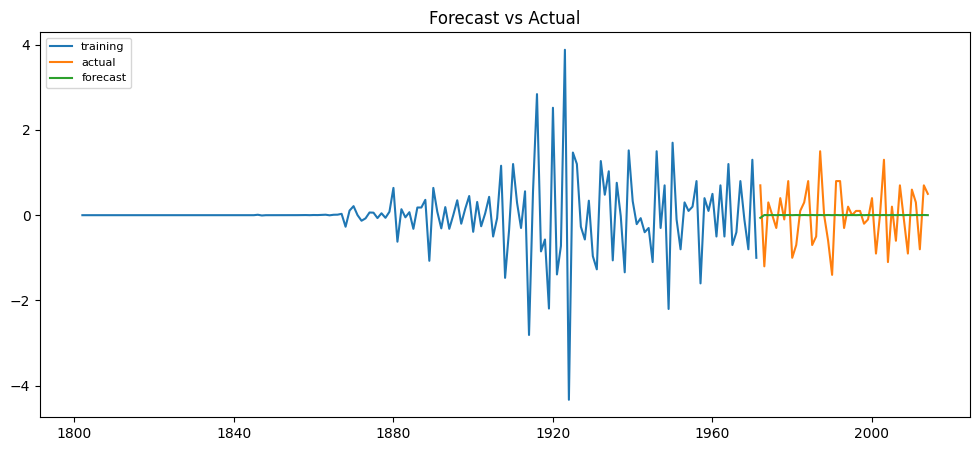

In [157]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train["CO2"], label='training')
plt.plot(test["CO2"], label='actual')
plt.plot(pred_arima, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [158]:
#RMSE value
RMSE_ARIMA = RMSE_Value(pred_arima.values,test.values)
RMSE_ARIMA

0.6708913412122994

In [162]:
#MAPE Value
MAPE_ARIMA = MAPE_Value(pred_arima.values, test.values)
MAPE_ARIMA

inf

#### Auto Regressor (AR) model

In [125]:
model_ar = AutoReg(train,lags = 6).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CO2   No. Observations:                  170
Model:                     AutoReg(6)   Log Likelihood                -136.827
Method:               Conditional MLE   S.D. of innovations              0.557
Date:                Thu, 13 Apr 2023   AIC                            289.653
Time:                        17:26:13   BIC                            314.452
Sample:                    01-01-1808   HQIC                           299.721
                         - 01-01-1971                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0196      0.044      0.450      0.653      -0.066       0.105
CO2.L1        -1.0307      0.075    -13.674      0.000      -1.178      -0.883
CO2.L2        -1.0651      0.103    -10.377      0.0

In [126]:
### prediction on test set
pred_ar = model_ar.predict(start=start,end=end,dynamic = False)
print(pred_ar)

1974-01-01   -0.155579
1975-01-01    0.054239
1976-01-01   -0.059303
1977-01-01    0.108803
1978-01-01   -0.153236
1979-01-01    0.065136
1980-01-01    0.082311
1981-01-01   -0.072513
1982-01-01    0.029973
1983-01-01   -0.004145
1984-01-01   -0.003914
1985-01-01   -0.001108
1986-01-01    0.020970
1987-01-01    0.009367
1988-01-01   -0.014197
1989-01-01    0.010373
1990-01-01    0.001232
1991-01-01    0.001386
1992-01-01    0.008640
1993-01-01    0.004964
1994-01-01    0.001480
1995-01-01    0.000918
1996-01-01    0.005016
1997-01-01    0.003409
1998-01-01    0.003899
1999-01-01    0.004848
2000-01-01    0.002731
2001-01-01    0.002750
2002-01-01    0.003542
2003-01-01    0.003940
2004-01-01    0.003701
2005-01-01    0.003687
2006-01-01    0.003550
2007-01-01    0.003179
2008-01-01    0.003487
2009-01-01    0.003711
2010-01-01    0.003647
2011-01-01    0.003577
2012-01-01    0.003516
2013-01-01    0.003471
2014-01-01    0.003494
2015-01-01    0.003599
2016-01-01    0.003606
Freq: AS-JA

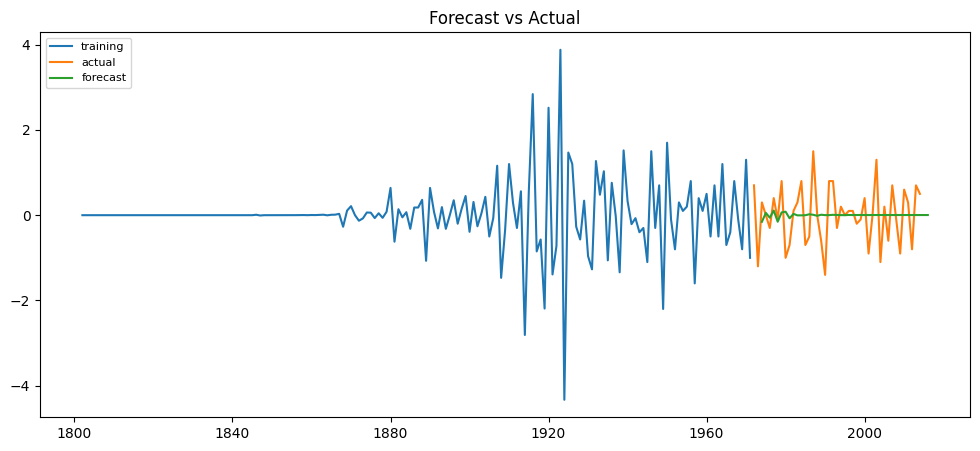

In [127]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train["CO2"], label='training')
plt.plot(test["CO2"], label='actual')
plt.plot(pred_ar, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [153]:
#RMSE Value
RMSE_AR = RMSE_Value(pred_ar.values,test.values)
RMSE_AR

0.67228108715811

In [161]:
#MAPE Value
MAPE_AR = MAPE_Value(pred_ar.values, test.values)
MAPE_AR

inf

#### Moving Average (MA) model

In [130]:
#order(0,1,3)
model_ma = ARIMA(train['CO2'],order = (0,1,3))
model_ma = model_ma.fit()
model_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  170
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -147.611
Date:                Thu, 13 Apr 2023   AIC                            303.222
Time:                        17:26:30   BIC                            315.742
Sample:                    01-01-1802   HQIC                           308.303
                         - 01-01-1971                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.1047      1.947     -1.081      0.280      -5.922       1.712
ma.L2          1.2108      2.166      0.559      0.576      -3.034       5.455
ma.L3         -0.1058      0.223     -0.473      0.636      -0.544       0.332
sigma2         0.3035      0.593      0.512      0.609      -0.859       1.466
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               148.61
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):          100724.60   Skew:                            -0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [131]:
### prediction on test set
pred_ma = model_ma.predict(start=start,end=end)
print(pred_ma)

1974-01-01    0.001607
1975-01-01    0.001607
1976-01-01    0.001607
1977-01-01    0.001607
1978-01-01    0.001607
1979-01-01    0.001607
1980-01-01    0.001607
1981-01-01    0.001607
1982-01-01    0.001607
1983-01-01    0.001607
1984-01-01    0.001607
1985-01-01    0.001607
1986-01-01    0.001607
1987-01-01    0.001607
1988-01-01    0.001607
1989-01-01    0.001607
1990-01-01    0.001607
1991-01-01    0.001607
1992-01-01    0.001607
1993-01-01    0.001607
1994-01-01    0.001607
1995-01-01    0.001607
1996-01-01    0.001607
1997-01-01    0.001607
1998-01-01    0.001607
1999-01-01    0.001607
2000-01-01    0.001607
2001-01-01    0.001607
2002-01-01    0.001607
2003-01-01    0.001607
2004-01-01    0.001607
2005-01-01    0.001607
2006-01-01    0.001607
2007-01-01    0.001607
2008-01-01    0.001607
2009-01-01    0.001607
2010-01-01    0.001607
2011-01-01    0.001607
2012-01-01    0.001607
2013-01-01    0.001607
2014-01-01    0.001607
2015-01-01    0.001607
2016-01-01    0.001607
Freq: AS-JA

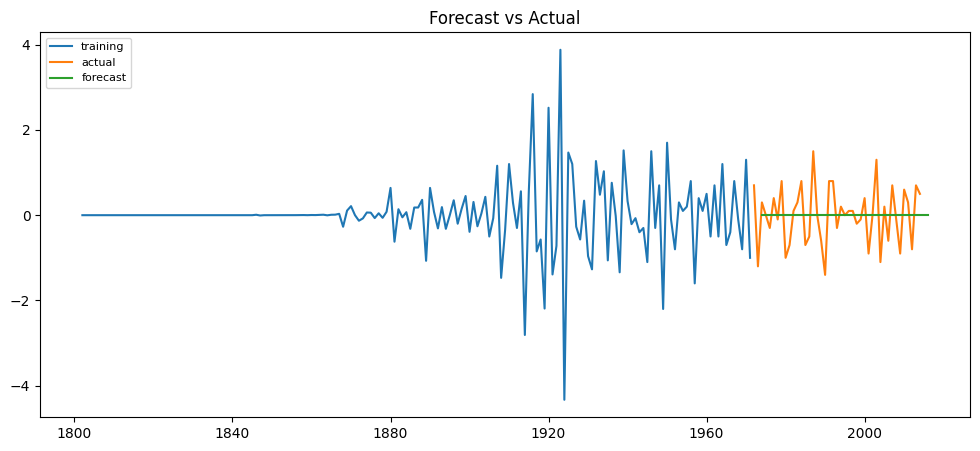

In [132]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train["CO2"], label='training')
plt.plot(test["CO2"], label='actual')
plt.plot(pred_ma, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [150]:
#RMSE Value
RMSE_MA = RMSE_Value(pred_ma.values,test.values)
RMSE_MA

0.6708167470640443

In [151]:
#MAPE Value
MAPE_MA = MAPE_Value(pred_ma.values, test.values)
MAPE_MA

inf

### Comparison of Models :

In [163]:
#Compare the results 

compare_model = {"MODEL":pd.Series(["Single Exponential","Holts Winter","Holts winter exp add sea and add trend","Holts winter exp mul sea and add trend","Holts winter exp mul sea and mul trend","Linear Model","Exponential Model","Quadratic Model","ARIMA Model(stationary)","Auto Regressor","Moving Average","ARIMA(3,1,4)"]),
                 "RMSE_Values" :pd.Series([rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_model_mul_add_model,rmse_hwe_model_mul_add_model,rmse_linear_model,rmse_Exp_model,rmse_Quad_model,RMSE_ARIMA ,RMSE_AR,RMSE_MA,RMSE_ARIMA_a]),
                 "MAPE_Values" :pd.Series([MAPE_ses_model,MAPE_hw_model,MAPE_hwe_add_add_model,MAPE_hwe_model_mul_add_model,MAPE_hwe_model_mul_add_model,MAPE_linear_model,MAPE_Exp_model,MAPE_Quad_model,MAPE_ARIMA ,MAPE_AR,MAPE_MA,MAPE_ARIMA_a])
                }
table_rmse=pd.DataFrame(compare_model)
table_rmse.sort_values(['MAPE_Values']) 

,MODEL,RMSE_Values,MAPE_Values
11,"ARIMA(3,1,4)",0.848325,0.044453
0,Single Exponential,0.899392,0.048941
2,Holts winter exp add sea and add trend,2.457455,0.127490
5,Linear Model,3.144516,0.164839
7,Quadratic Model,4.495138,0.231502
3,Holts winter exp mul sea and add trend,12.054009,0.633035
4,Holts winter exp mul sea and mul trend,12.054009,0.633035
1,Holts Winter,2.451214,0.704964
6,Exponential Model,550.330710,27.070959
8,ARIMA Model(stationary),0.670891,inf


In [136]:
#After comparing all RMSE and MAPE values of above models we have found that 
#ARIMA model (3,1,4) has least MAPE value = 0.0444 and RMSE value=0.8483
#we are considering ARIMA model (3,1,4) as our final model.

### Final Model:

In [137]:
final_arima = ARIMA(df['CO2'],order = (3,1,4))
final_arima = final_arima.fit()
final_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  215
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -166.984
Date:                Thu, 13 Apr 2023   AIC                            349.968
Time:                        17:26:51   BIC                            376.895
Sample:                    01-01-1800   HQIC                           360.849
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4805      0.189      7.829      0.000       1.110       1.851
ar.L2         -0.1107      0.363     -0.305      0.760      -0.822       0.600
ar.L3         -0.4446      0.188     -2.360      0.018      -0.814      -0.075
ma.L1         -1.5635      0.196     -7.973      0.000      -1.948      -1.179
ma.L2          0.0744      0.361      0.206      0.837      -0.633       0.781
ma.L3          0.7941      0.187      4.255      0.000       0.428       1.160
ma.L4         -0.2327      0.052     -4.499      0.000      -0.334      -0.131
sigma2         0.2757      0.021     13.162      0.000       0.235       0.317
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                78.18
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):             231.62   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [138]:
final_arima.fittedvalues.tail(20)

Year
1995-01-01    15.913831
1996-01-01    16.117814
1997-01-01    16.447430
1998-01-01    16.821482
1999-01-01    17.031792
2000-01-01    17.154503
2001-01-01    17.594122
2002-01-01    17.155338
2003-01-01    16.879443
2004-01-01    17.514358
2005-01-01    17.160552
2006-01-01    17.310052
2007-01-01    16.550079
2008-01-01    16.739102
2009-01-01    16.462203
2010-01-01    15.746929
2011-01-01    15.433681
2012-01-01    15.301867
2013-01-01    14.560096
2014-01-01    14.550811
dtype: float64

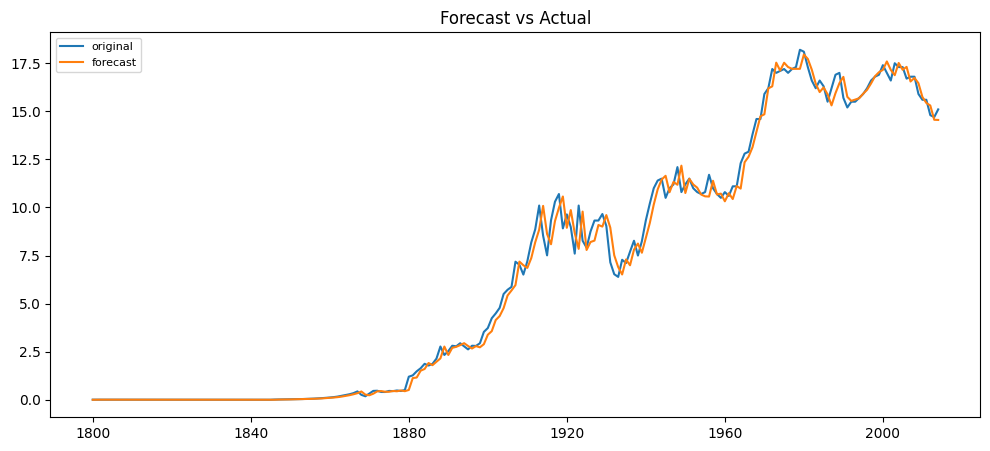

In [139]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original')
plt.plot(final_arima.fittedvalues, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [140]:
#Forecasting for next 5 years

final_arima.forecast(5)


2015-01-01    14.773561
2016-01-01    14.559110
2017-01-01    14.503463
2018-01-01    14.462163
2019-01-01    14.502526
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [141]:
pred_5=final_arima.forecast(5)


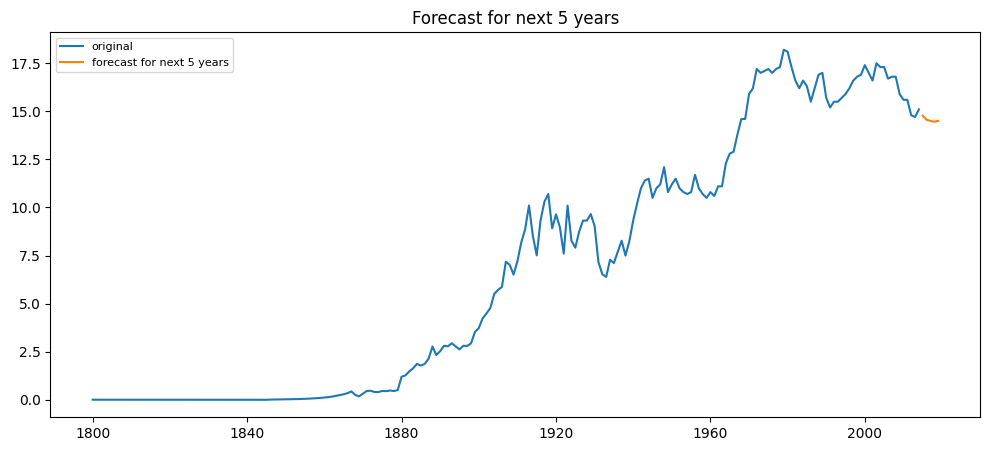

In [142]:
#plot 
#forecast for next 5 years

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original')
plt.plot(pred_5, label='forecast for next 5 years')
plt.title('Forecast for next 5 years')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [143]:
#Forecasting for next 10 years

final_arima.forecast(10)

2015-01-01    14.773561
2016-01-01    14.559110
2017-01-01    14.503463
2018-01-01    14.462163
2019-01-01    14.502526
2020-01-01    14.591596
2021-01-01    14.737352
2022-01-01    14.925328
2023-01-01    15.147876
2024-01-01    15.391729
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [144]:
pred_10= final_arima.forecast(10)

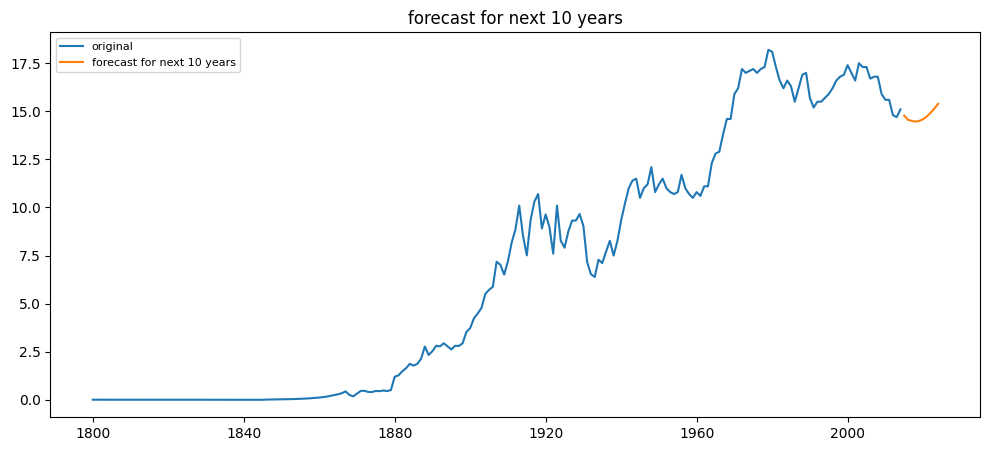

In [145]:
#plot 
#forecast for next 10 years

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original')
plt.plot(pred_10, label='forecast for next 10 years')
plt.title('forecast for next 10 years')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [146]:
#Forecasting for next 20 years

final_arima.forecast(20)

2015-01-01    14.773561
2016-01-01    14.559110
2017-01-01    14.503463
2018-01-01    14.462163
2019-01-01    14.502526
2020-01-01    14.591596
2021-01-01    14.737352
2022-01-01    14.925328
2023-01-01    15.147876
2024-01-01    15.391729
2025-01-01    15.644525
2026-01-01    15.892830
2027-01-01    16.124024
2028-01-01    16.326406
2029-01-01    16.490027
2030-01-01    16.607061
2031-01-01    16.672227
2032-01-01    16.682998
2033-01-01    16.639694
2034-01-01    16.545420
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [147]:
pred_20=final_arima.forecast(20)

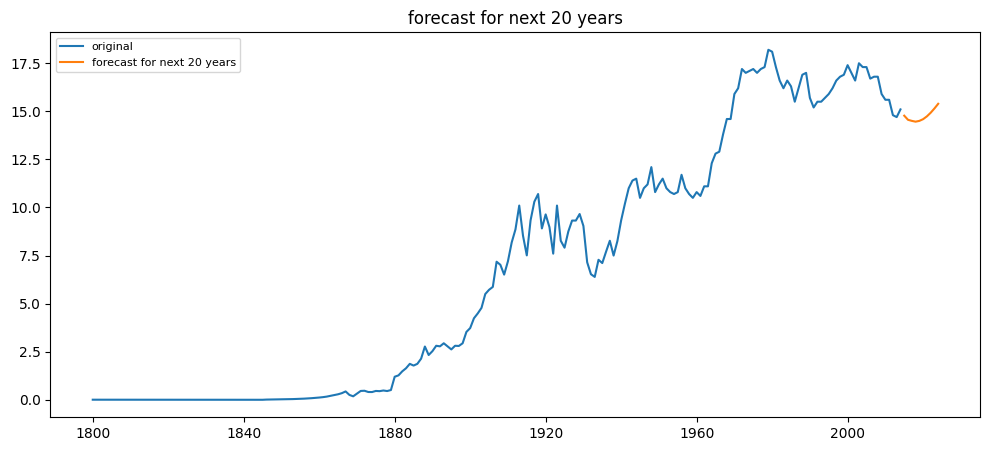

In [148]:
#plot 
#forecast for next 20 years

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original')
plt.plot(pred_10, label='forecast for next 20 years')
plt.title('forecast for next 20 years')
plt.legend(loc='upper left', fontsize=8)
plt.show()